In [22]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import os

In [23]:
# Load the dataset
df = pd.read_csv('../data/benin-malanville.csv')

In [28]:
# check the shape of the dataset
display(df.shape)

(525600, 19)

In [30]:
# Summary Statistics & Missing-Value Report
#   df.describe()
display(df.describe())

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [31]:
# Missing Value Report
# write a function to print the missing value report
def missing_report(df):
    """
    This function takes a DataFrame and returns a DataFrame with missing values.
    
    :param df: pandas DataFrame, the input DataFrame
    :return: pandas DataFrame, the DataFrame with missing values
    """
    na_counts = df.isna().sum()
    total = len(df)
    null_report = pd.DataFrame({
        'Missing Count': na_counts,
        'Missing %': (na_counts / total * 100).round(2)
    })
    high_nulls = null_report[null_report['Missing %'] > 5]
    if not high_nulls.empty:
        print("Columns with >5% missing values:")
        display(high_nulls)

missing_report(df)


Columns with >5% missing values:


,Missing Count,Missing %
Comments,525600,100.0


In [ ]:
# Outlier Detection & Basic Cleaning
def clean_and_export_data(df, key_columns=None, zscore_columns=None, z_thresh=3):
    """
    Clean the DataFrame by handling missing values and removing outliers.

    Parameters:
    - df: The original DataFrame
    - country: The country name used for export file naming
    - key_columns: List of columns to check for missing values (default: ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust'])
    - zscore_columns: List of columns to compute Z-scores on (same as key_columns by default)
    - z_thresh: Z-score threshold to define outliers (default: 3)

    Returns:
    - Cleaned DataFrame
    """

    # Drop or impute (median) missing values in key columns.
    # Handle missing values
    if key_columns is None:
        key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
    for col in key_columns:
        df[col] = df[col].fillna(df[col].median())

    # Compute Z-scores
    if zscore_columns is None:
        zscore_columns = key_columns
    for col in zscore_columns:
        df[f'{col}_zscore'] = zscore(df[col])

    # Flag outliers
    for col in zscore_columns:
        df[f'{col}_outlier'] = np.abs(df[f'{col}_zscore']) > z_thresh

    # Export cleaned data
    # df.to_csv(f'../data/benin_clean.csv', index=False)

    return df

cleaned_data = clean_and_export_data(df, key_columns=['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust'], zscore_columns=['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust'], z_thresh=3)
display(cleaned_data)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,...,ModB_zscore,WS_zscore,WSgust_zscore,GHI_outlier,DNI_outlier,DHI_outlier,ModA_outlier,ModB_outlier,WS_outlier,WSgust_outlier
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,...,-0.723088,-1.322831,-1.187312,False,False,False,False,False,False,False
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,...,-0.723088,-1.322831,-1.384442,False,False,False,False,False,False,False
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,...,-0.723088,-1.135736,-0.842334,False,False,False,False,False,False,False
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,...,-0.723088,-1.198101,-1.039464,False,False,False,False,False,False,False
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,...,-0.723088,-1.260466,-1.039464,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-08-08 23:56,-5.5,-0.1,-5.9,0.0,0.0,23.1,98.3,0.3,1.1,...,-0.723088,-1.135736,-0.842334,False,False,False,False,False,False,False
525596,2022-08-08 23:57,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.2,0.7,...,-0.723088,-1.198101,-1.039464,False,False,False,False,False,False,False
525597,2022-08-08 23:58,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.4,0.6,1.1,...,-0.723088,-0.948641,-0.842334,False,False,False,False,False,False,False
525598,2022-08-08 23:59,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.9,1.3,...,-0.723088,-0.761547,-0.743769,False,False,False,False,False,False,False


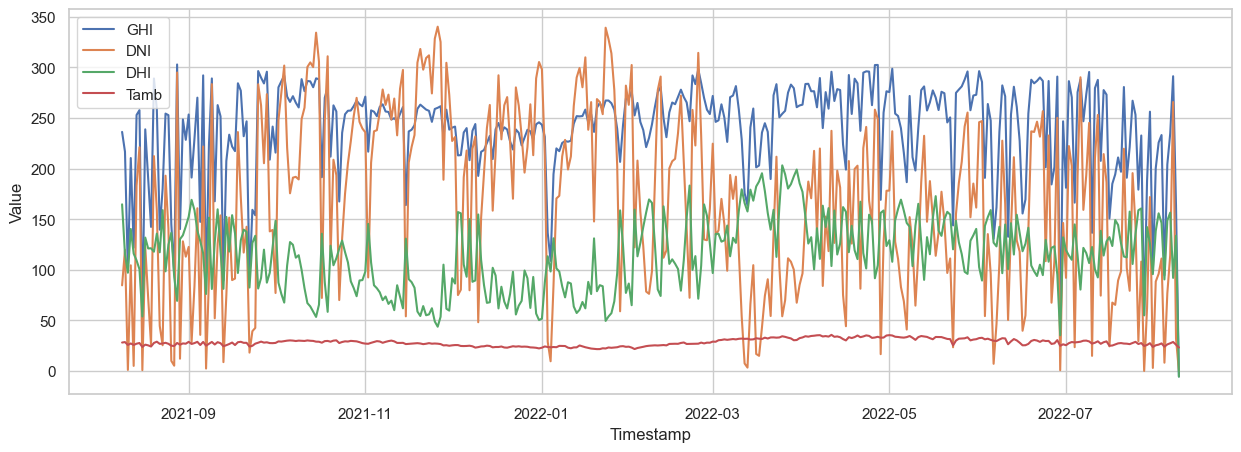

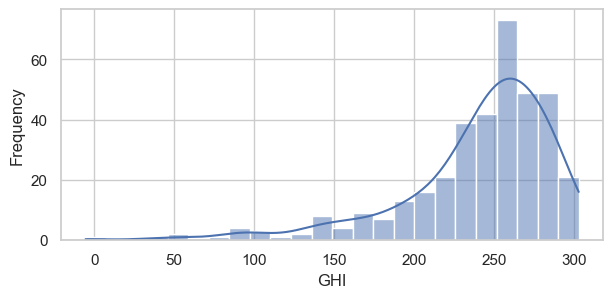

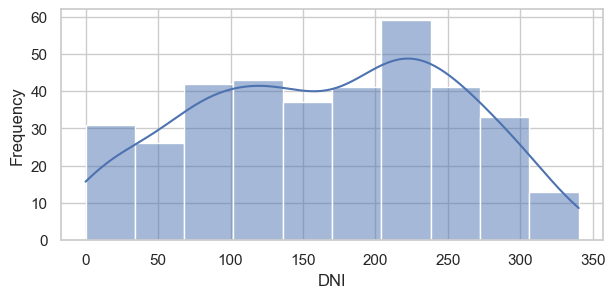

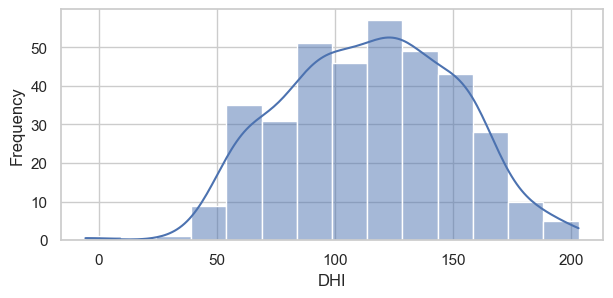

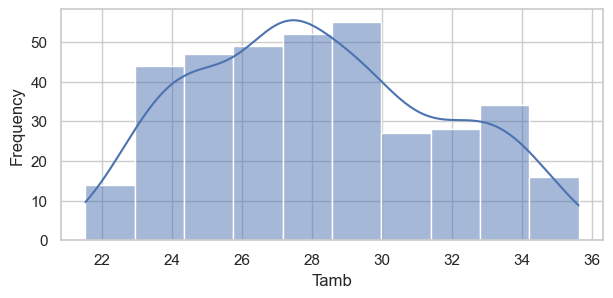

In [ ]:
# Time Series Analysis
# Line or bar charts of GHI, DNI, DHI, Tamb vs. Timestamp.
# Observe patterns by month, trends throughout day, or anomalies, such as peaks in solar irradiance or temperature fluctuations. 
def plot_time_series(df):
    """
    Plot time series data for specified columns.

    Parameters:
    - df: DataFrame containing the time series data
    - columns: List of columns to plot
    - title: Title of the plot
    """
    # df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    # df.set_index('Timestamp', inplace=True)
    # Resample the data to daily frequency
    df_daily = df.resample('D').mean()
    df_daily['Timestamp'] = df_daily.index
    df_daily.set_index('Timestamp', inplace=True)
    df_daily.head()
    # Plotting the time series data
    plt.figure(figsize=(15, 5))
    plt.plot(df_daily.index, df_daily['GHI'], label='GHI')
    plt.plot(df_daily.index, df_daily['DNI'], label='DNI')
    plt.plot(df_daily.index, df_daily['DHI'], label='DHI')
    plt.plot(df_daily.index, df_daily['Tamb'], label='Tamb')

    plt.xlabel('Timestamp')
    plt.ylabel('Value')
    plt.legend()
    plt.show()
    # Plotting the distribution of GHI
    plt.figure(figsize=(7, 3))
    sns.histplot(df_daily['GHI'], kde=True)
    plt.xlabel('GHI')
    plt.ylabel('Frequency')
    plt.show()
    # Plotting the distribution of DNI
    plt.figure(figsize=(7, 3))
    sns.histplot(df_daily['DNI'], kde=True)
    plt.xlabel('DNI')
    plt.ylabel('Frequency')
    plt.show()
    # Plotting the distribution of DHI
    plt.figure(figsize=(7, 3))
    sns.histplot(df_daily['DHI'], kde=True)
    plt.xlabel('DHI')
    plt.ylabel('Frequency')
    plt.show()
    # Plotting the distribution of Tamb
    plt.figure(figsize=(7, 3))
    sns.histplot(df_daily['Tamb'], kde=True)
    plt.xlabel('Tamb')
    plt.ylabel('Frequency')
    plt.show()

plot_time_series(cleaned_data)

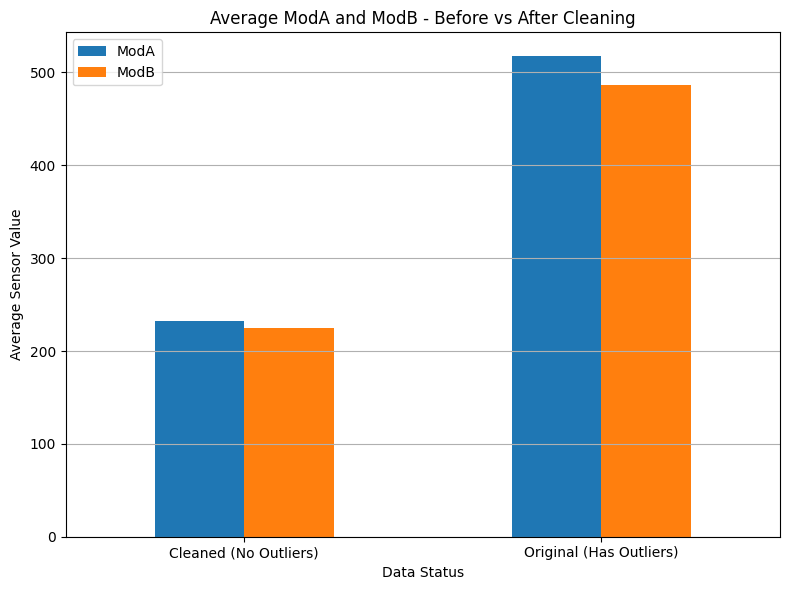

In [ ]:
# Cleaning Impact
# Group by Cleaning flag and plot average ModA & ModB pre/post-clean.

def plot_cleaning_impact(df):
    """
    Compare average ModA and ModB values before and after cleaning (outlier removal).
    
    Parameters:
    - df: DataFrame containing outlier flags and ModA, ModB columns
    """

    # Define a new column: True if any outlier is flagged in key columns
    df['any_outlier'] = (
        df[['GHI_outlier', 'DNI_outlier', 'DHI_outlier', 'ModA_outlier', 
            'ModB_outlier', 'WS_outlier', 'WSgust_outlier']]
        .any(axis=1)
    )

    # Group by outlier flag
    grouped = df.groupby('any_outlier')[['ModA', 'ModB']].mean()
    grouped.index = ['Cleaned (No Outliers)', 'Original (Has Outliers)']

    # Plot
    grouped.plot(kind='bar', figsize=(8, 6), rot=0)
    plt.title('Average ModA and ModB - Before vs After Cleaning')
    plt.ylabel('Average Sensor Value')
    plt.xlabel('Data Status')
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()

plot_cleaning_impact(cleaned_data)

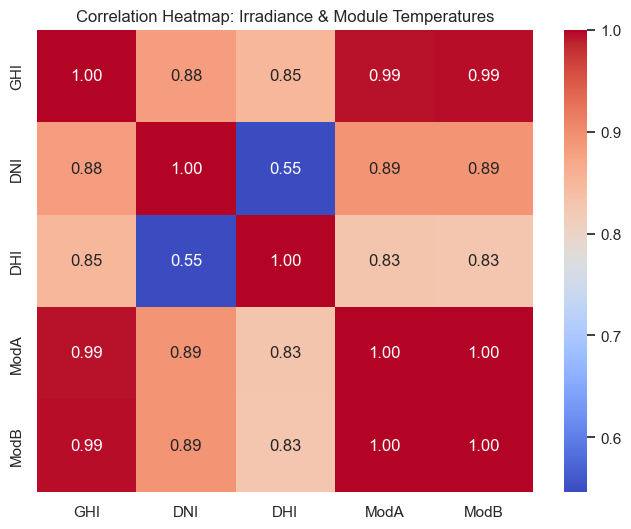

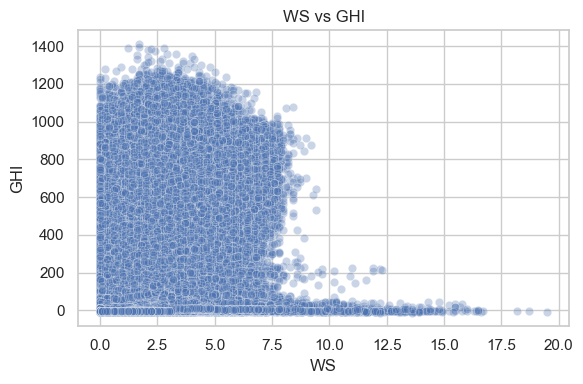

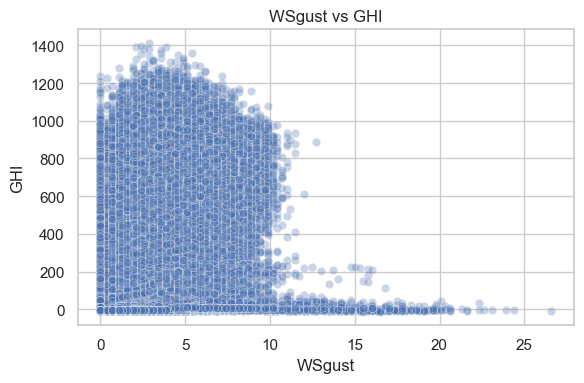

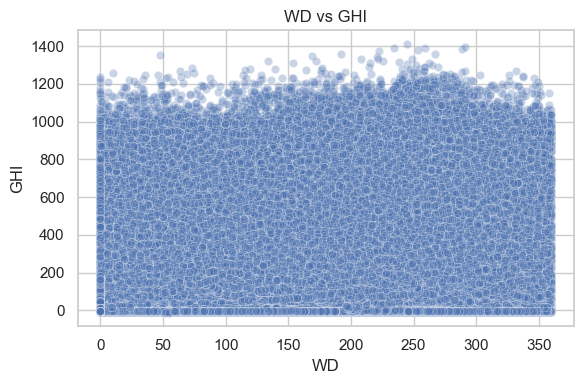

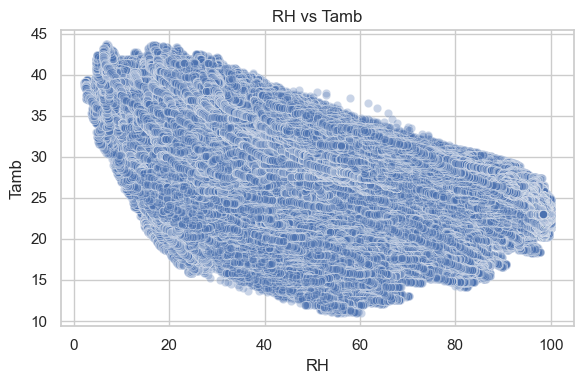

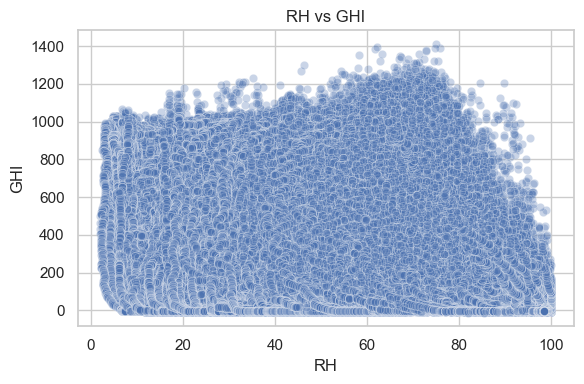

In [ ]:
# Correlation & Relationship Analysis
# Heatmap of correlations (GHI, DNI, DHI, TModA, TModB).
# Scatter plots: WS, WSgust, WD vs. GHI; RH vs. Tamb or RH vs. GHI.

def correlation_and_relationship_analysis(df):
    """
    Generate correlation heatmap and scatter plots for relationship analysis.
    """
    # Set plot style
    sns.set(style='whitegrid', context='notebook')

    # Correlation Heatmap
    corr_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB']
    corr_matrix = df[corr_cols].corr()

    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap: Irradiance & Module Temperatures')
    plt.show()

    # Scatter plots
    scatter_pairs = [
        ('WS', 'GHI'),
        ('WSgust', 'GHI'),
        ('WD', 'GHI'),
        ('RH', 'Tamb'),
        ('RH', 'GHI')
    ]

    for x, y in scatter_pairs:
        if x in df.columns and y in df.columns:
            plt.figure(figsize=(6, 4))
            sns.scatterplot(x=df[x], y=df[y], alpha=0.3)
            plt.title(f'{x} vs {y}')
            plt.xlabel(x)
            plt.ylabel(y)
            plt.tight_layout()
            plt.show()

correlation_and_relationship_analysis(cleaned_data)

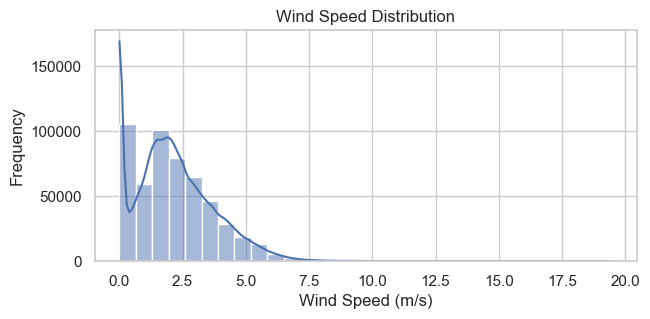

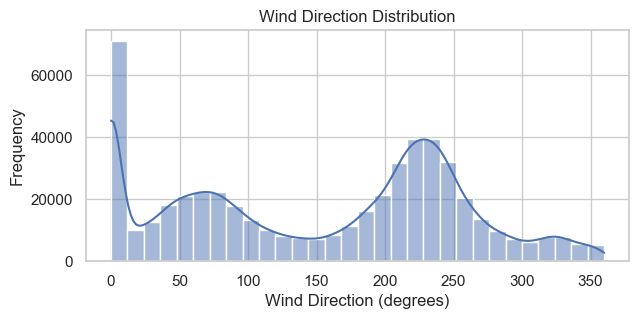

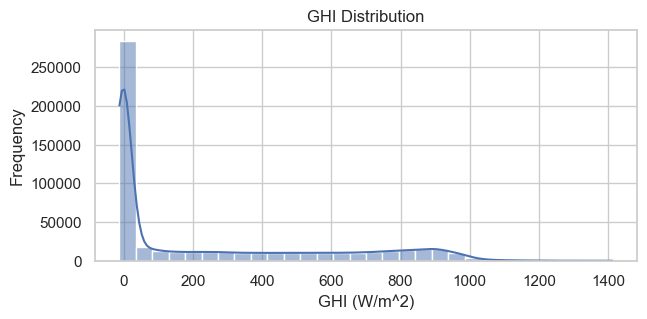

In [ ]:
# Wind & Distribution Analysis
# Wind rose or radial bar plot of WS/WD.
# Histograms for GHI and one other variable (e.g. WS).

def wind_and_distribution_analysis(df):
    """
    Analyze wind speed and direction distribution.
    """
    # Wind Speed Distribution
    plt.figure(figsize=(7, 3))
    sns.histplot(df['WS'], bins=30, kde=True)
    plt.title('Wind Speed Distribution')
    plt.xlabel('Wind Speed (m/s)')
    plt.ylabel('Frequency')
    plt.show()

    # Wind Direction Distribution
    plt.figure(figsize=(7, 3))
    sns.histplot(df['WD'], bins=30, kde=True)
    plt.title('Wind Direction Distribution')
    plt.xlabel('Wind Direction (degrees)')
    plt.ylabel('Frequency')
    plt.show()

    # Histograms for GHI and one other variable (e.g. WS).
    plt.figure(figsize=(7, 3))
    sns.histplot(df['GHI'], bins=30, kde=True)
    plt.title('GHI Distribution')
    plt.xlabel('GHI (W/m^2)')
    plt.ylabel('Frequency')
    plt.show()

    # Bar plot for GHI and WS
    # plt.figure(figsize=(7, 3))
    # sns.barplot(x='GHI', y='WS', data=df)
    # plt.title('GHI vs WS')
    # plt.xlabel('GHI (W/m^2)')
    # plt.ylabel('WS (m/s)')
    # plt.show()

# Example usage
wind_and_distribution_analysis(cleaned_data)

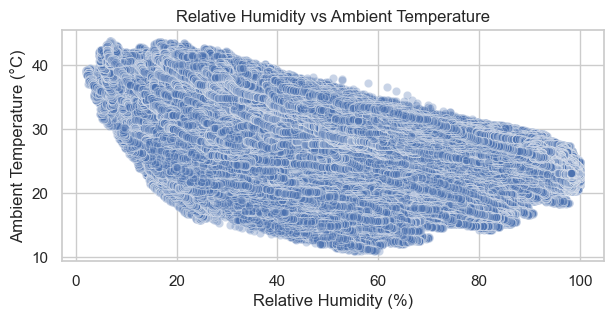

Correlation between RH and Tamb: -0.41


In [ ]:
# Temperature Analysis
# Examine how relative humidity (RH) might influence temperature readings and solar radiation.

def temperature_analysis(df):
    """
    Analyze the relationship between relative humidity (RH) and temperature readings.
    """
    # Scatter plot of RH vs Tamb
    plt.figure(figsize=(7, 3))
    sns.scatterplot(x=df['RH'], y=df['Tamb'], alpha=0.3)
    plt.title('Relative Humidity vs Ambient Temperature')
    plt.xlabel('Relative Humidity (%)')
    plt.ylabel('Ambient Temperature (°C)')
    plt.show()

    # Correlation between RH and Tamb
    corr = df[['RH', 'Tamb']].corr().iloc[0, 1]
    print(f'Correlation between RH and Tamb: {corr:.2f}')

temperature_analysis(cleaned_data)

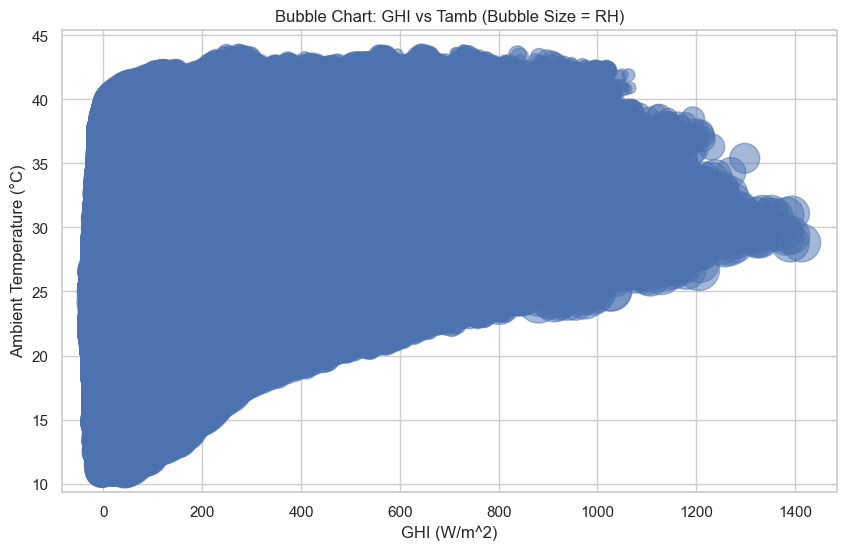

In [ ]:
# Bubble Chart
# GHI vs. Tamb with bubble size = RH or BP.

def bubble_chart(df):
    """
    Create a bubble chart of GHI vs. Tamb with bubble size based on RH.
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(df['GHI'], df['Tamb'], s=df['RH']*10, alpha=0.5)
    plt.title('Bubble Chart: GHI vs Tamb (Bubble Size = RH)')
    plt.xlabel('GHI (W/m^2)')
    plt.ylabel('Ambient Temperature (°C)')
    plt.grid(True)
    plt.show()

bubble_chart(cleaned_data)